In [1]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
data=pd.read_csv("archive/spotify_millsongdata.csv")

In [3]:
data.shape

(57650, 4)

In [4]:
data.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [6]:
data.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [7]:
top_artists=data['artist'].value_counts().head(10)
print(top_artists)

artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [8]:
data=data.drop('link',axis=1).reset_index(drop=True)

In [9]:
data

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...
...,...,...,...
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...


In [10]:
# WordCloud for song lyrics
all_lyrics = " ".join(data['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

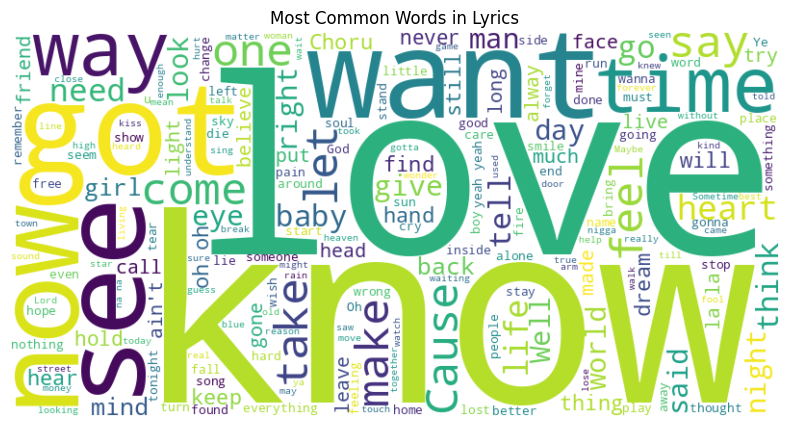

In [11]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/speech/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/speech/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/speech/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
stop_words=set(stopwords.words('english'))

In [16]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [17]:
def preprocess_text(text):
    text=re.sub(r"[^a-zA-Z\s]"," ",text)
    text=text.lower()
    tokens=word_tokenize(text)
    tokens=[word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [18]:
data['cleaned_text']=data['text'].apply(preprocess_text)

In [19]:
data.head()

,artist,song,text,cleaned_text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...",look face wonderful face means something speci...
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...",take easy please touch gently like summer even...
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,never know go put lousy rotten show boy tough ...
3,ABBA,Bang,Making somebody happy is a question of give an...,making somebody happy question give take learn...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,making somebody happy question give take learn...


In [31]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [32]:
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors

X = normalize(tfidf_matrix, copy=False)

k = 10  # keep only top-10 neighbors per document
nn = NearestNeighbors(n_neighbors=k, metric="cosine", algorithm="brute")
nn.fit(X)

dist, idx = nn.kneighbors(X, return_distance=True)
cos_sim_topk = 1 - dist

In [40]:
nbr_idx = idx  

In [41]:
def rec_songs(song_name, nbr_idx, cos_sim_topk, df, top_n=10):
    q = df['song'].str.lower().eq(song_name.lower())
    if not q.any():
        return "Song not found"

    i = q.idxmax()  # index of query song

    neighbors = nbr_idx[i][:top_n]
    scores = cos_sim_topk[i][:top_n]

    out = df.loc[neighbors, ['artist', 'song']].copy()
    out['score'] = scores
    return out

In [42]:
data['song'][2]

'As Good As New'

In [45]:
rec_songs('As Good As New', nbr_idx, cos_sim_topk, data, top_n=10)

,artist,song,score
2,ABBA,As Good As New,1.000000
43654,Michael Buble,Feeling Good,0.463555
18919,Stevie Wonder,I'm New,0.457704
45850,Nina Simone,Feeling Good,0.408471
50387,Reba Mcentire,A New Love,0.393382
43019,Marilyn Manson,New Model No. 15,0.385779
56291,Whitney Houston,You Give Good Love,0.376944
10751,Kirk Franklin,So Good,0.367477
42156,Louis Armstrong,Got A Bran' New Suit,0.363312
24652,Beach Boys,Good Timin',0.361507
